# Feature Extraction for Vehicle Detection

In [1]:
import feature_extraction as fe
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
from skimage.feature import hog
from skimage import exposure
import time
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.ndimage.measurements import label
%matplotlib inline

In [2]:
# get files
cars = glob.glob('../playground/exploration/vehicles/**/*.png', recursive=True)
notcars = glob.glob('../playground/exploration/non-vehicles/**/*.png', recursive=True)

In [3]:
color_list = {
    'HSV': cv2.COLOR_RGB2HSV,
    'LUV': cv2.COLOR_RGB2LUV,
    'HLS': cv2.COLOR_RGB2HLS,
    'YUV': cv2.COLOR_RGB2YUV,
    'YCrCb': cv2.COLOR_RGB2YCrCb
}

## Explore Spatial Binning

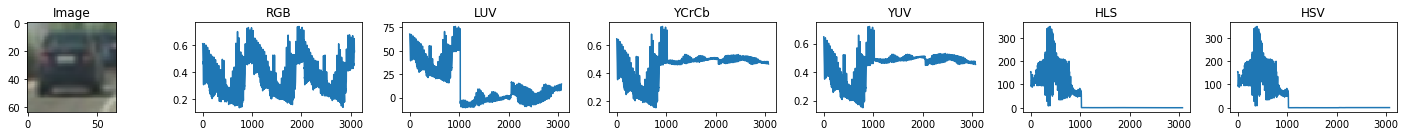

In [11]:
image = cv2.cvtColor(cv2.imread(cars[0]), cv2.COLOR_BGR2RGB)
image = image.astype(np.float32)/255

fig, ax = plt.subplots(1,7,figsize=(20,2))

ax[0].imshow(image)
ax[0].set_title('Image')
feature_vec = fe.bin_spatial(image)
ax[1].plot(feature_vec)
ax[1].set_title('RGB')
i = 2
for key in color_list:
    img = cv2.cvtColor(image, color_list[key])
    feature_vec = fe.bin_spatial(img)
    ax[i].plot(feature_vec)
    ax[i].set_title(key)
    i += 1
plt.tight_layout()
plt.show()

## Explore the color histogram

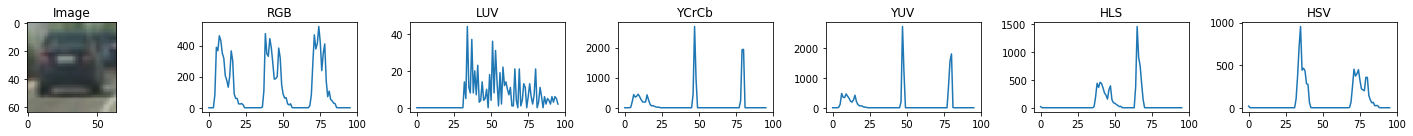

In [12]:
image = cv2.cvtColor(cv2.imread(cars[0]), cv2.COLOR_BGR2RGB)
image = image.astype(np.float32)/255

fig, ax = plt.subplots(1,7,figsize=(20,2))

ax[0].imshow(image)
ax[0].set_title('Image')
feature_vec = fe.color_hist(image)
ax[1].plot(feature_vec)
ax[1].set_title('RGB')
i = 2
for key in color_list:
    img = cv2.cvtColor(image, color_list[key])
    feature_vec = fe.color_hist(img)
    ax[i].plot(feature_vec)
    ax[i].set_title(key)
    i += 1
plt.tight_layout()
plt.show()

## Explore Hog Features

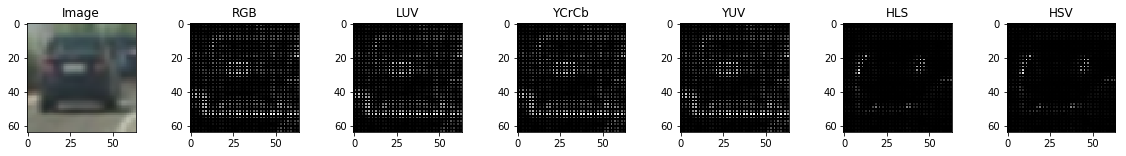

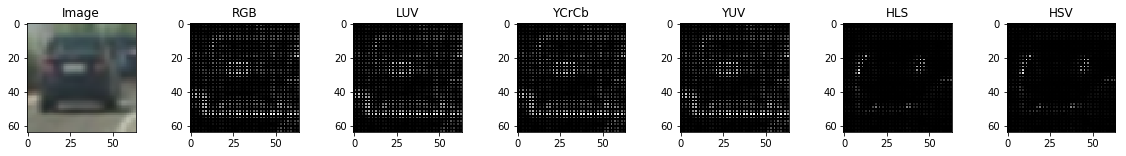

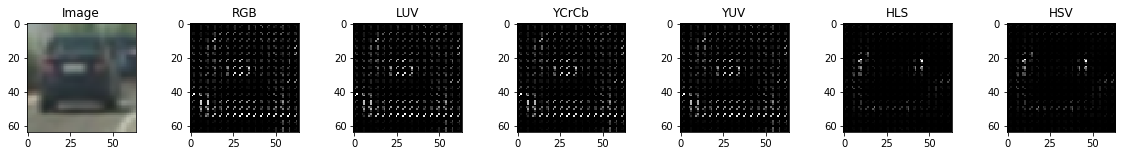

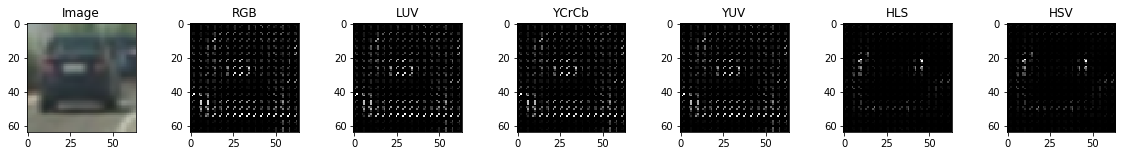

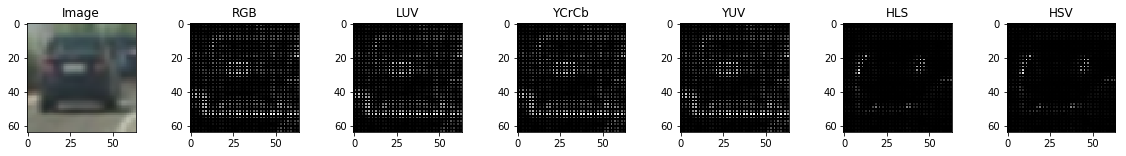

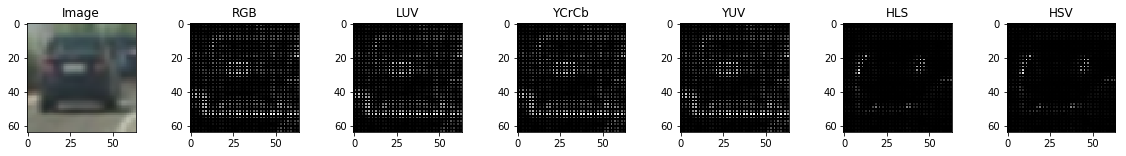

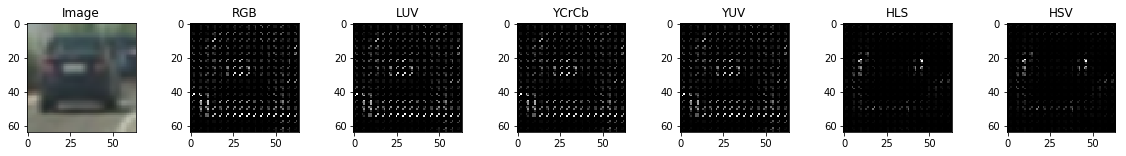

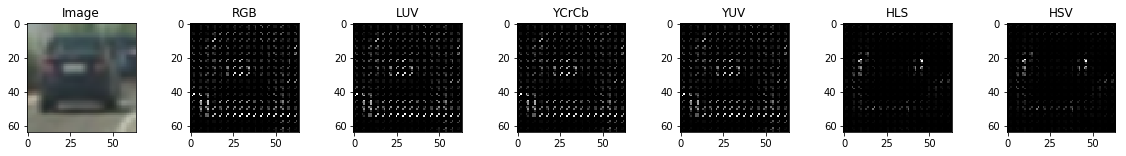

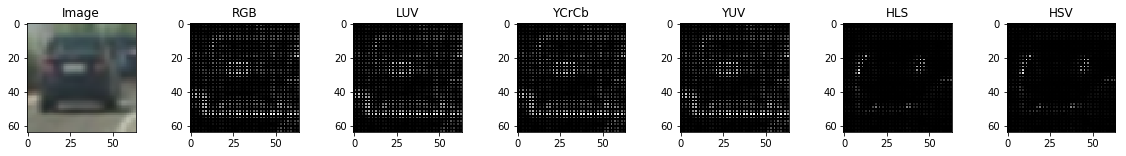

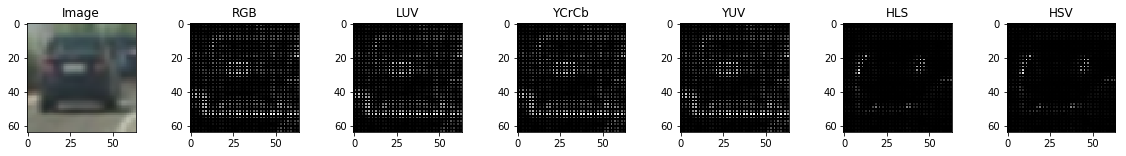

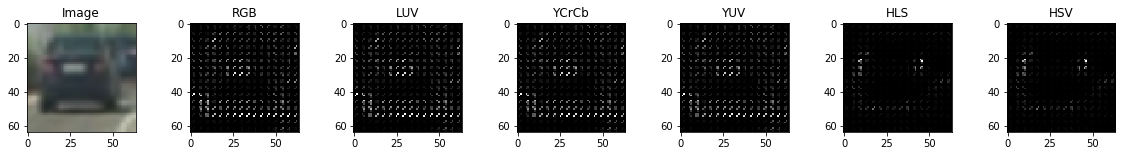

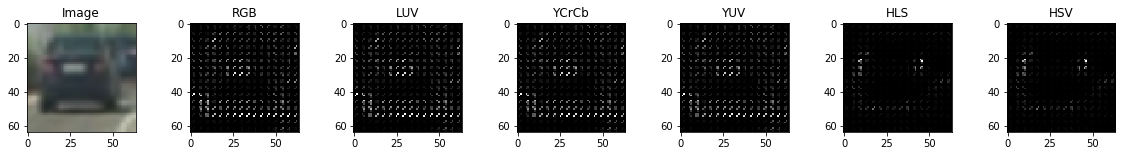

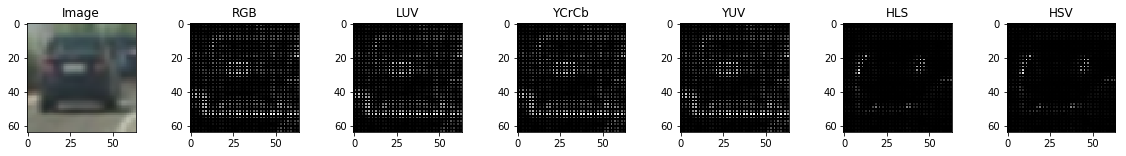

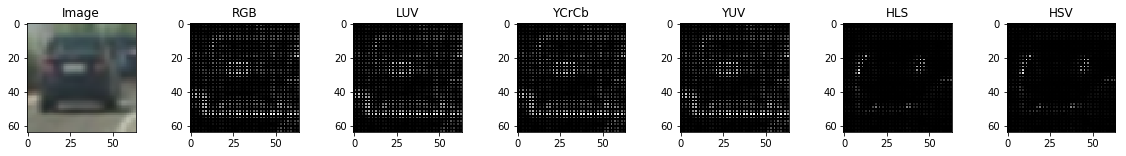

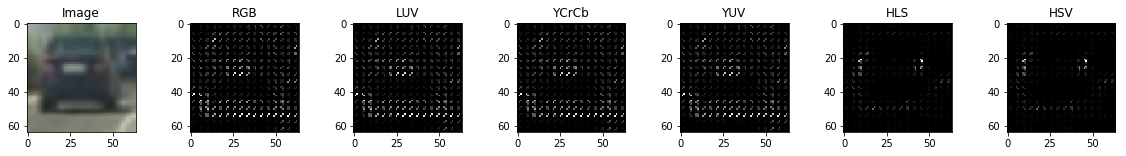

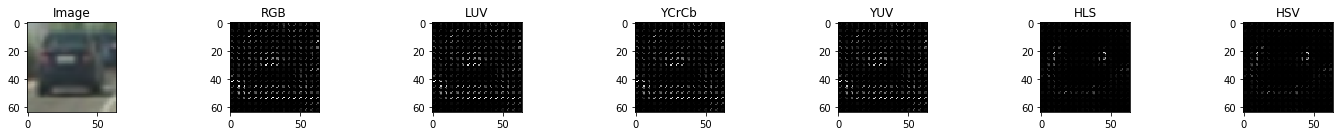

In [17]:
image = cv2.cvtColor(cv2.imread(cars[0]), cv2.COLOR_BGR2RGB)
image = image.astype(np.float32)/255

hog_list = [
    [5,9,11,13],
    [2,4],
    [2,4]
]

hog_params = [[x,y,z] for x in hog_list[0] for y in hog_list[1] for z in hog_list[2]]

for param in hog_params:
    fig, ax = plt.subplots(1,7,figsize=(20,2))
    ax[0].imshow(image)
    ax[0].set_title('Image')
    features, hog_image = fe.get_hog_features(image[:,:,0], orient=param[0], 
                        pix_per_cell=param[1], cell_per_block=param[2], 
                        vis=True, feature_vec=False)
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
    ax[1].imshow(hog_image_rescaled, cmap='gray')
    ax[1].set_title('RGB')
    i = 2
    for key in color_list:
        img = cv2.cvtColor(image, color_list[key])
        features, hog_image = fe.get_hog_features(img[:,:,0], orient=param[0], 
                        pix_per_cell=param[1], cell_per_block=param[2], 
                        vis=True, feature_vec=False)
        hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
        ax[i].imshow(hog_image_rescaled, cmap='gray')
        ax[i].set_title(key)
        i += 1
plt.tight_layout()
plt.show()